## *Image Classification*

By: Jorge Cardenas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path
import os.path

from sklearn.model_selection import train_test_split
import tensorflow as tf

2023-06-28 14:45:49.902405: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-28 14:45:50.306923: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-28 14:45:50.307888: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-28 14:45:53.987405: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
shape_path = os.path.abspath('Data/shapes')
dir_list = os.listdir(shape_path)
item =np.array(dir_list)

files_available = []


for folder in item:
    datapath=shape_path+'/'+folder
    
    dir_data = os.listdir(datapath)
    if '.DS_Store' in dir_data:
        dir_data.remove('.DS_Store')
        files_available.append((folder,dir_data))
    else:
        files_available.append((folder,dir_data))



In [17]:
batch_size = 32
img_height = 28
img_width = 28
data_dir = Path(shape_path)

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

validation_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

test_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 300 files belonging to 3 classes.
Using 240 files for training.
Found 300 files belonging to 3 classes.


Using 60 files for validation.
Found 300 files belonging to 3 classes.
Using 60 files for validation.


In [4]:
for x,y in validation_ds.take(1):
    print(x.shape) 

(32, 28, 28, 3)


2023-06-28 14:45:57.843454: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [60]
	 [[{{node Placeholder/_4}}]]
2023-06-28 14:45:57.844118: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [60]
	 [[{{node Placeholder/_0}}]]


2023-06-28 14:45:58.063217: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [240]
	 [[{{node Placeholder/_4}}]]
2023-06-28 14:45:58.063991: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [240]
	 [[{{node Placeholder/_4}}]]
2023-06-28 14:45:58.098988: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [240]
	 [[

(32, 28, 28, 3)
(32,)


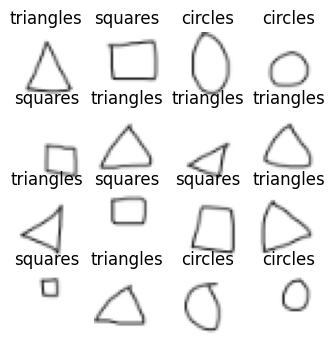

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))

for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

for images, labels in train_ds.take(1):
  for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(train_ds.class_names[labels[i]])
    plt.axis("off")


class_names = train_ds.class_names

In [6]:
# Rescale 

normalization_layer =  tf.keras.layers.Rescaling(1./255)

#hay dos opciones
# una es incluir esta capa en el modelo




#la otra opción es aplicar la normalización desde ya directamente sobre los datos.
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

0.19607845 1.0


2023-06-28 14:45:59.042811: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [240]
	 [[{{node Placeholder/_4}}]]
2023-06-28 14:45:59.044130: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [240]
	 [[{{node Placeholder/_0}}]]


## Training

In [10]:
#Data performance
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = validation_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [11]:
inputs = tf.keras.Input(shape=(28, 28, 1))

In [113]:
num_classes = 3

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [114]:
history=model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=50,
  callbacks=[
        tf.keras.callbacks.ModelCheckpoint('./model.h5', save_best_only=True, save_weights_only=True)
    ]
)

Epoch 1/50


8/8 [==============================] - 2s 55ms/step - loss: 1.1019 - accuracy: 0.3375 - val_loss: 1.1003 - val_accuracy: 0.3000
Epoch 2/50
8/8 [==============================] - 0s 24ms/step - loss: 1.0974 - accuracy: 0.3417 - val_loss: 1.0973 - val_accuracy: 0.3000
Epoch 3/50
8/8 [==============================] - 0s 24ms/step - loss: 1.0967 - accuracy: 0.3958 - val_loss: 1.0985 - val_accuracy: 0.3000
Epoch 4/50
8/8 [==============================] - 0s 31ms/step - loss: 1.0921 - accuracy: 0.3417 - val_loss: 1.0882 - val_accuracy: 0.3833
Epoch 5/50
8/8 [==============================] - 0s 40ms/step - loss: 1.0898 - accuracy: 0.3750 - val_loss: 1.0911 - val_accuracy: 0.3000
Epoch 6/50
8/8 [==============================] - 0s 24ms/step - loss: 1.0820 - accuracy: 0.4958 - val_loss: 1.0737 - val_accuracy: 0.6833
Epoch 7/50
8/8 [==============================] - 0s 24ms/step - loss: 1.0685 - accuracy: 0.5375 - val_loss: 1.0602 - val_accuracy: 0.4500
Epoch 8/50
8/8 [======================

In [115]:
results = model.evaluate(test_ds, verbose=0)
print("Loss: {:.4f}".format(results[0]))
print("Accuracy: {:.2f} %".format(results[1] * 100))

Loss: 0.2702
Accuracy: 90.00 %


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


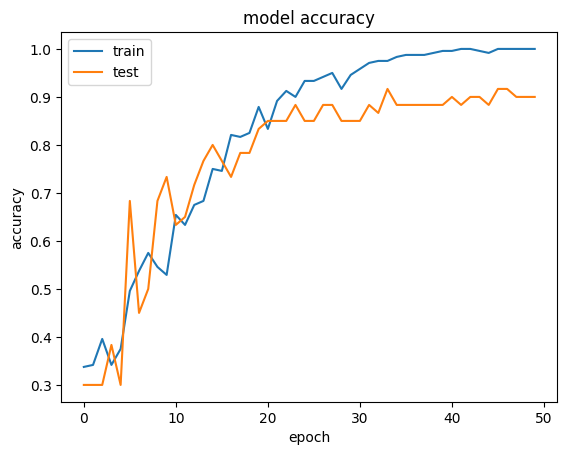

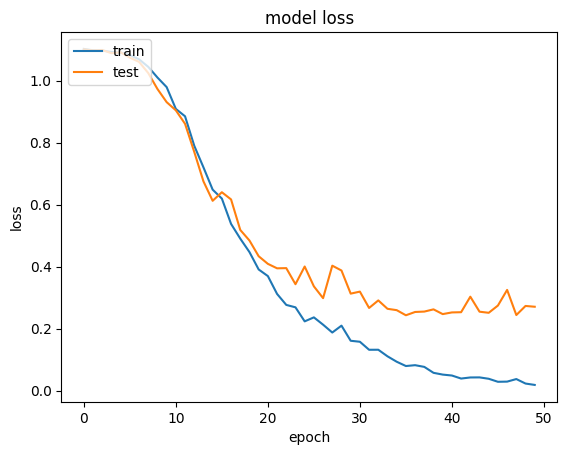

In [116]:
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [117]:
from PIL import Image


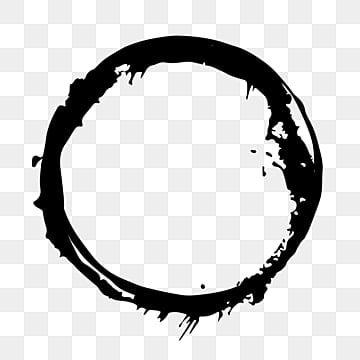

In [167]:
path = 'images/'
images = os.listdir(path)
images

image_name='circle2.jpg'


max_width = 28
max_height = 28
im_original = Image.open(path + image_name)
max_size = (max_width, max_height)
im = im_original.copy()
im.thumbnail(max_size)
im.save(path + 'thumbnails/' + 'resized.jpg')
im = Image.open(path + '/thumbnails/' + 'resized.jpg')
im_original

In [168]:
#opcion 1



np_image = np.array(im).astype('float32')/255
np_image = np.expand_dims(np_image, axis=0)
np_image[:4]

array([[[[0.93333334, 0.93333334, 0.93333334],
         [0.9411765 , 0.9411765 , 0.9411765 ],
         [0.99215686, 0.99215686, 0.99215686],
         ...,
         [0.9882353 , 0.9882353 , 0.9882353 ],
         [0.95686275, 0.95686275, 0.95686275],
         [0.93333334, 0.93333334, 0.93333334]],

        [[0.91764706, 0.91764706, 0.91764706],
         [0.95686275, 0.95686275, 0.95686275],
         [0.9529412 , 0.9529412 , 0.9529412 ],
         ...,
         [0.972549  , 0.972549  , 0.972549  ],
         [0.972549  , 0.972549  , 0.972549  ],
         [0.972549  , 0.972549  , 0.972549  ]],

        [[0.99607843, 0.99607843, 0.99607843],
         [1.        , 1.        , 1.        ],
         [0.94509804, 0.94509804, 0.94509804],
         ...,
         [0.9490196 , 0.9490196 , 0.9490196 ],
         [0.972549  , 0.972549  , 0.972549  ],
         [0.99215686, 0.99215686, 0.99215686]],

        ...,

        [[0.9843137 , 0.9843137 , 0.9843137 ],
         [0.98039216, 0.98039216, 0.98039216]

In [169]:

image = tf.keras.utils.load_img('./images/thumbnails/resized.jpg')
input_arr = tf.keras.utils.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = model.predict(input_arr)

1/1 [==============================] - 0s 73ms/step


### Final Prediction

In [170]:
print(class_names[int(np.argmax(predictions, axis=1))] )

circles


https://www.tensorflow.org/tutorials/load_data/images?hl=es-419